Uma das tarefas passadas pela equipe de supervisão do órgão ambiental era de encontrar a emissão média de cada gás por ano. Conseguimos realizar essa tarefa usando o método groupby() e pivot_table() para gerar uma tabela contendo a emissão ao longo dos anos para cada um dos gases.

A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos. Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela, sem utilizar o método groupby. 

In [ ]:
import pandas as pd

emissoes_gases = pd.read_excel('../Dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')


colunas_info = list(emissoes_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)

emissoes_por_ano = emissoes_gases.melt(id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão')

c:\Users\gerso\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
colunas_info = list(emissoes_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)

emissoes_por_ano = emissoes_gases.melt(id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão')

# Minha Solução

array([<Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>], dtype=object)

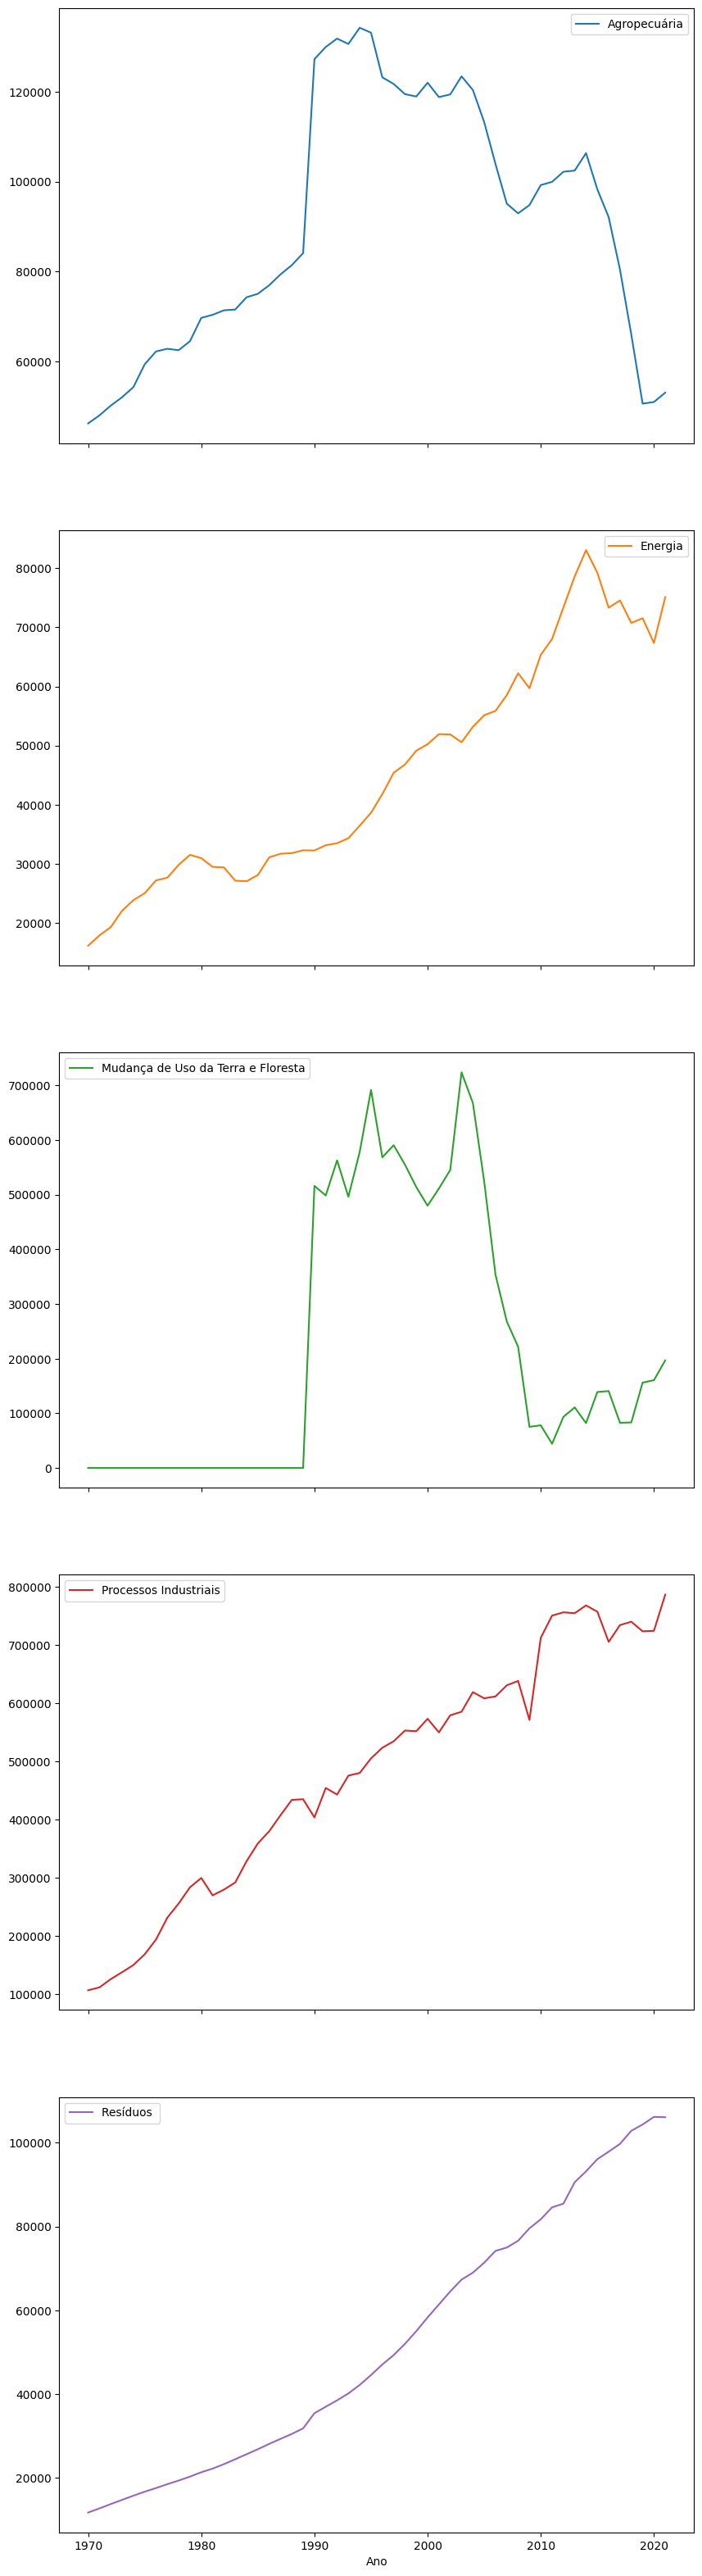

In [9]:
media_emissao_setor = emissoes_por_ano.groupby(['Ano', 'Nível 1 - Setor'])['Emissão'].mean().reset_index()



media_emissao_setor.pivot_table(index='Ano', columns='Nível 1 - Setor', values='Emissão').plot(subplots=True, figsize=(10, 40))

# Solução do Professor

In [11]:
emissoes_setor = emissoes_por_ano.pivot_table(values='Emissão', index='Ano', columns='Nível 1 - Setor', aggfunc='mean')
emissoes_setor

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,46246.897891,16144.173809,0.000000,106549.168676,11684.883558
1971,48036.199926,17885.238953,0.000000,111532.507753,12676.706849
1972,50202.891428,19293.468629,0.000000,125701.525455,13709.697850
1973,52065.314764,22056.314835,0.000000,137657.110402,14715.248028
1974,54319.383750,23846.090343,0.000000,149941.779638,15710.616150
1975,59391.923086,25025.762137,0.000000,168471.860169,16667.446706
1976,62248.257994,27196.813347,0.000000,193826.482068,17539.505222
1977,62839.220909,27651.064663,0.000000,231505.609283,18462.455148
1978,62523.059780,29819.997276,0.000000,255736.210711,19327.840165


array([<Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>,
       <Axes: xlabel='Ano'>, <Axes: xlabel='Ano'>], dtype=object)

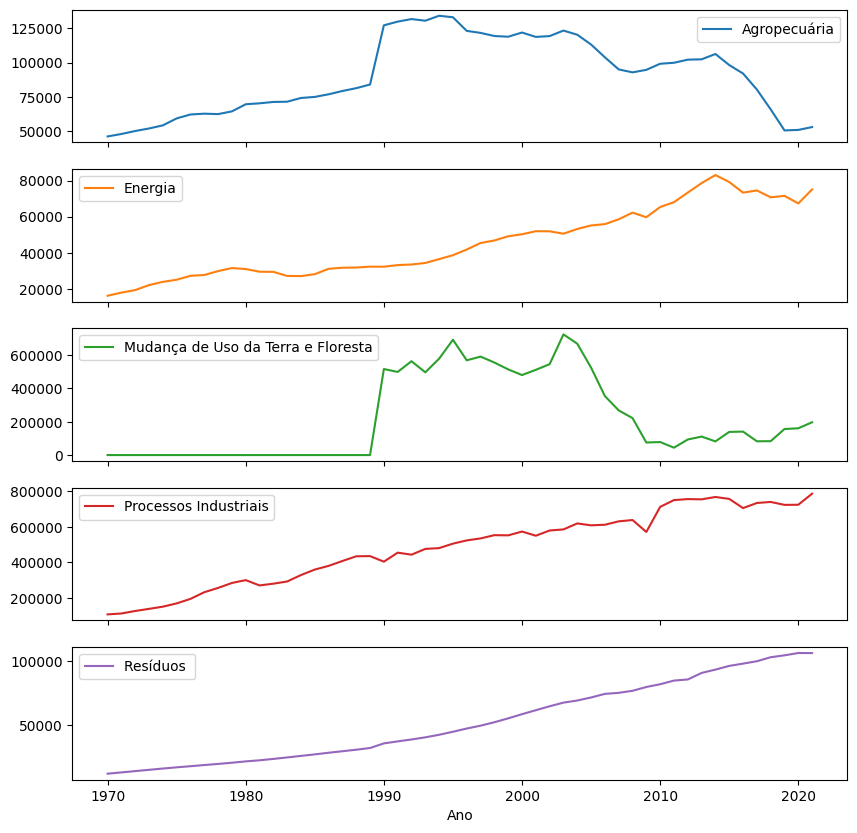

In [12]:
emissoes_setor.plot(subplots=True, figsize=(10, 10))